# Logistic Regression

In this notebook you will test your implementation of your logistic regression model, which is trained using gradient descent. Recall that a logistic regression model outputs the probability of the possitive label given the input by using a sigmoid function over a linear combination of the input variables:

$$P_{w}(y=1|x) = \sigma(\mathbf{z}), \mathbf{z}=\mathbf{x}^T\mathbf{w}$$,

where

$$\sigma(z) = \frac{1}{1+e^{-z}}$$.

Moreover, you could discretize the output of your logistic regression model by defining a threshold over the value of probability.

Along the notebook we will not only verify our implementation of the logistic regression model, but we will also see its limitations.

## Setup

In [104]:
import math
import random

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_moons

import matplotlib.pyplot as plt

In [2]:
plt.rc('font', family='serif')
%matplotlib inline

In [3]:
import lib, utils
%load_ext autoreload
%autoreload 2

In [169]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    df_train = df[df['split'] == 'train']
    X_train, y_train = df_train[['x1', 'x2']].values, df_train['y'].values
    df_test = df[df['split'] == 'test']
    X_test, y_test = df_test[['x1', 'x2']].values, df_test['y'].values
    return X_train, y_train, X_test, y_test

## Validate implementation

We will first do some basic tests on your implementation

**Validate implementation of sigmoid function**

In [6]:
assert lib.sigmoid(0.0) == 0.5
assert 0.62245 <= lib.sigmoid(0.5) <= 0.62246
assert 0.37754 <= lib.sigmoid(-0.5) <= 0.37755
np.testing.assert_array_almost_equal(lib.sigmoid(np.array([0, 0.5, -0.5])), np.array([0.5, 0.622459, 0.377541]))

you can also qualitatively test the implementation of the sigmoid function by ploting it and verifying that it looks as expected (S-shaped that tends to 0 on negative numbers and tends to 1 over the positives).

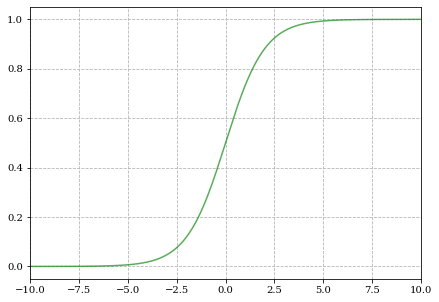

In [7]:
fig = plt.figure(figsize=[7, 5])
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
ax.grid(linestyle='--',color='0.7')
ax.set_xlim(-10, 10)
ax.plot(np.linspace(-10, 10, num=10000), lib.sigmoid(np.linspace(-10, 10, num=10000)), color='g', alpha=0.65)

hope it looks good!

**Validate implementation of the gradient of the loss function**

## Binary classification toy datasets

In the following we will see some toy examples of classification problems, your goal is to tune your model until you get good performance estimated quantitatively and quantitatively computing the accuracy of your predictions.


**Test Case 1**

In [181]:
X_train, y_train, X_test, y_test = load_data('dataset1.csv')

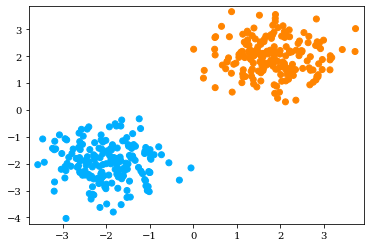

In [182]:
utils.plot_binary_classifcation(X_train, y_train)

Try to fit a losgistic regression to this data, use the learning curves as a way to find the right hyperparamters

In [183]:
clf = lib.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.00001, num_iterations=18000)

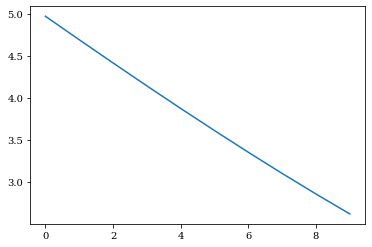

In [184]:
plt.plot(clf.learning_curves['loss'])

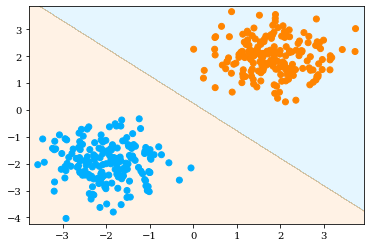

In [185]:
utils.plot_binary_classifcation(X_train, y_train, model=clf, threshold=0.5)

Once you are done, try to do the same with `dataset1.1.csv`.

**Test Case 2**

In [186]:
X_train, y_train, X_test, y_test = load_data('dataset2.csv')

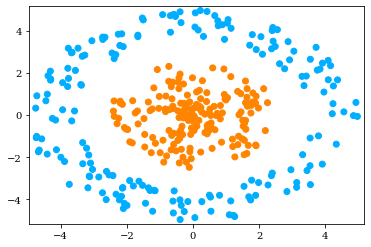

In [187]:
utils.plot_binary_classifcation(X_train, y_train)

In [188]:
clf = lib.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.00001, num_iterations=18000)

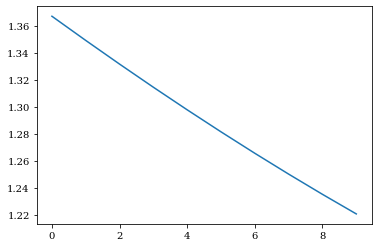

In [189]:
plt.plot(clf.learning_curves['loss'])

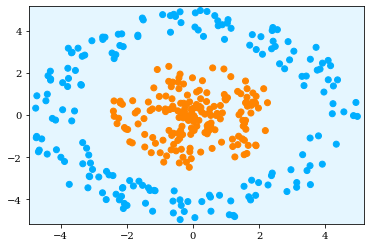

In [191]:
utils.plot_binary_classifcation(X_train, y_train, model=clf, threshold=0.5)

Once you are done, try to do the same with `dataset2.1.csv`.

**Test Case 3**

In [192]:
X_train, y_train, X_test, y_test = load_data('dataset3.csv')

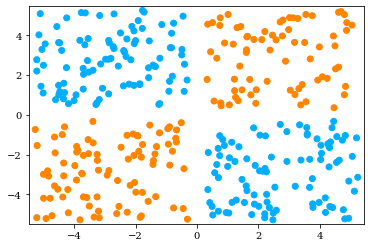

In [193]:
utils.plot_binary_classifcation(X_train, y_train)

In [194]:
clf = lib.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.00001, num_iterations=18000)

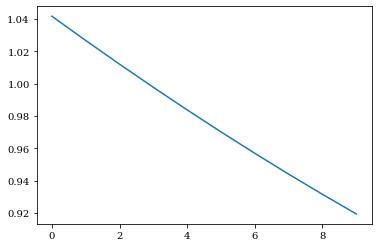

In [195]:
plt.plot(clf.learning_curves['loss'])

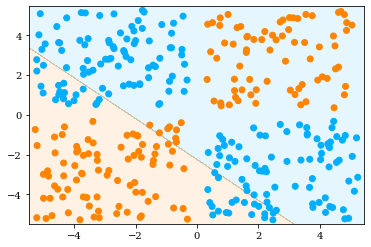

In [196]:
utils.plot_binary_classifcation(X_train, y_train, model=clf, threshold=0.5)

Once you are done, try to do the same with `dataset3.1.csv`.

**Test Case 4**

In [197]:
X_train, y_train, X_test, y_test = load_data('dataset4.csv')

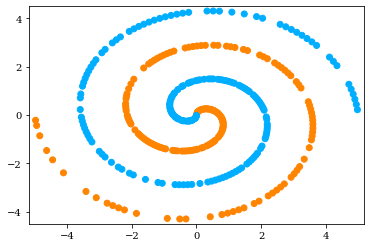

In [198]:
utils.plot_binary_classifcation(X_train, y_train)

In [199]:
clf = lib.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.00001, num_iterations=18000)

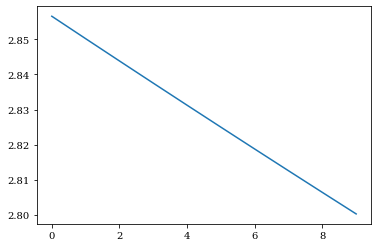

In [200]:
plt.plot(clf.learning_curves['loss'])

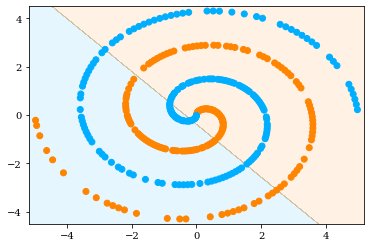

In [201]:
utils.plot_binary_classifcation(X_train, y_train, model=clf, threshold=0.5)

Once you are done, try to do the same with `dataset4.1.csv`.

**Test Case 5**

In [202]:
X_train, y_train, X_test, y_test = load_data('dataset5.csv')

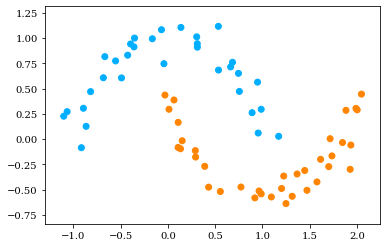

In [203]:
utils.plot_binary_classifcation(X_train, y_train)

In [204]:
clf = lib.LogisticRegression()
clf.fit(X_train, y_train, learning_rate=0.00001, num_iterations=18000)

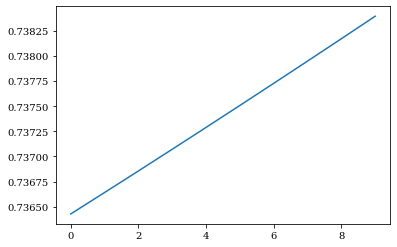

In [205]:
plt.plot(clf.learning_curves['loss'])

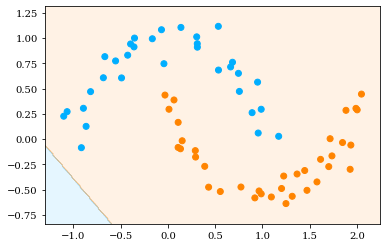

In [206]:
utils.plot_binary_classifcation(X_train, y_train, model=clf, threshold=0.5)

Once you are done, try to do the same with `dataset5.1.csv`.

## Things to remember

(after completing the excercise)

- The logistic regression model separates data points by finding the probability of one of the labels given the input data.
- This separation takes the form of a line given a threshold value.
- You could also use the same technique for non-linear problems by doing some feature engineering
- When noisy data is present, do not expect your algorithms to perform perfectly